In [1]:
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

# Decision trees and Ensemble methods

In [3]:
iris_data, iris_labels = load_iris().data, load_iris().target

In [4]:
iris_data.shape

(150, 4)

In [5]:
iris_data_train, iris_data_test, iris_labels_train, iris_labels_test = train_test_split(
    iris_data,
    iris_labels,
    train_size=100,
    stratify=iris_labels,
)

In [6]:
iris_data_train.shape, iris_data_test.shape, iris_labels_train.shape, iris_labels_test.shape

((100, 4), (50, 4), (100,), (50,))

In [7]:
tree = DecisionTreeClassifier(criterion="entropy", splitter="best")

In [8]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(criterion='entropy')

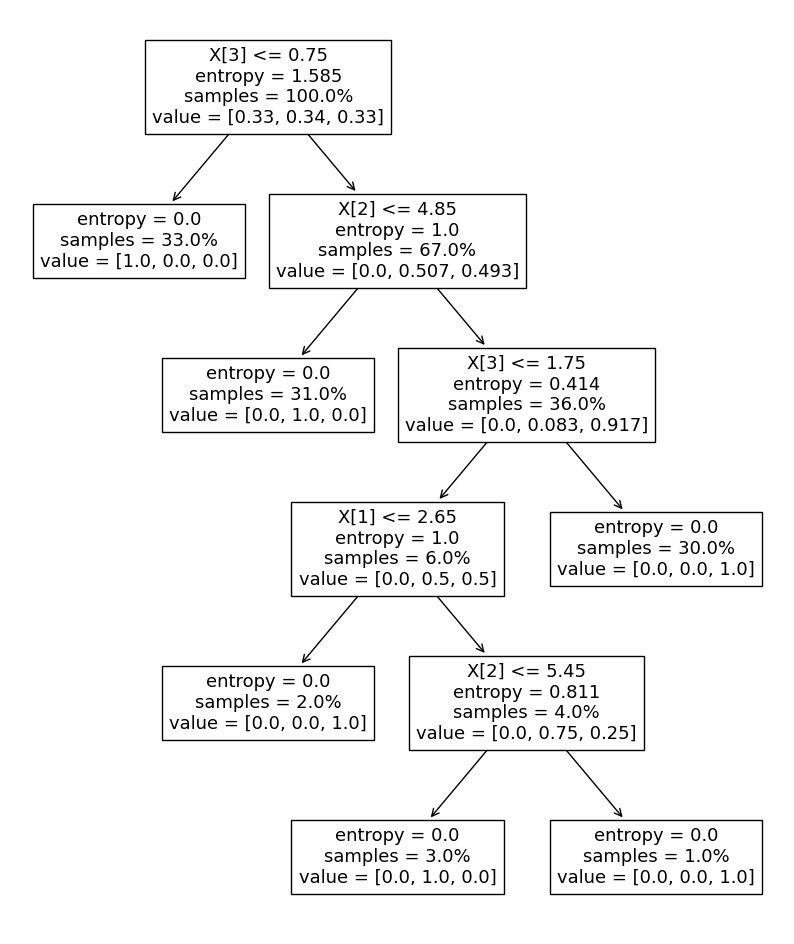

In [9]:
plt.figure(figsize=(10, 12))
plot_tree(tree, proportion=True)
plt.show()

In [10]:
tree.feature_importances_

array([0.        , 0.01738298, 0.34916889, 0.63344813])

In [11]:
tree.score(iris_data_train, iris_labels_train)

1.0

In [12]:
tree.score(iris_data_test, iris_labels_test)

0.9

In [13]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [14]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

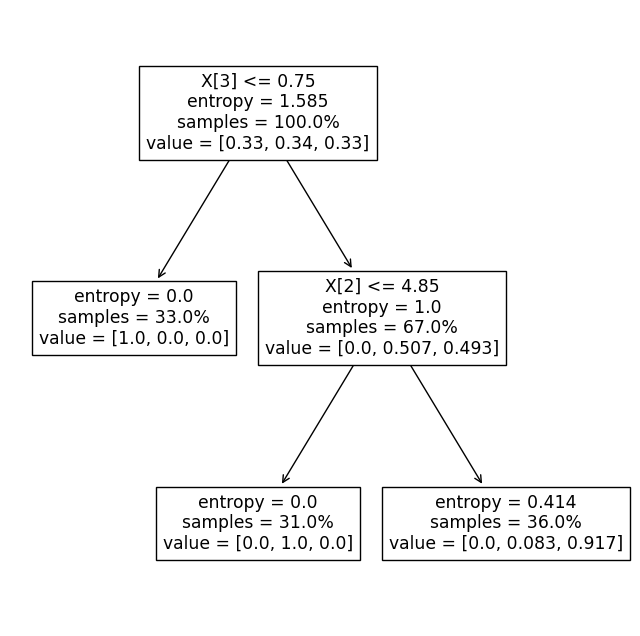

In [15]:
plt.figure(figsize=(8,8))
plot_tree(tree, proportion=True)
plt.show()

In [16]:
tree.score(iris_data_train, iris_labels_train)

0.97

In [17]:
tree.score(iris_data_test, iris_labels_test)

0.92

### Pruning - Cut the tree, insert bias but lower variance

In [18]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, min_samples_leaf=10)

## Random forest

In [19]:
forest = [DecisionTreeClassifier(splitter="random", max_depth=5),
          DecisionTreeClassifier(splitter="random", max_depth=5),
          DecisionTreeClassifier(splitter="random", max_depth=5
)]

In [20]:
for tree in forest:
    tree.fit(iris_data_train, iris_labels_train)

In [21]:
forest[0].feature_importances_

array([0.03221982, 0.        , 0.95618105, 0.01159913])

In [22]:
forest[1].feature_importances_

array([0.00166331, 0.02255203, 0.        , 0.97578466])

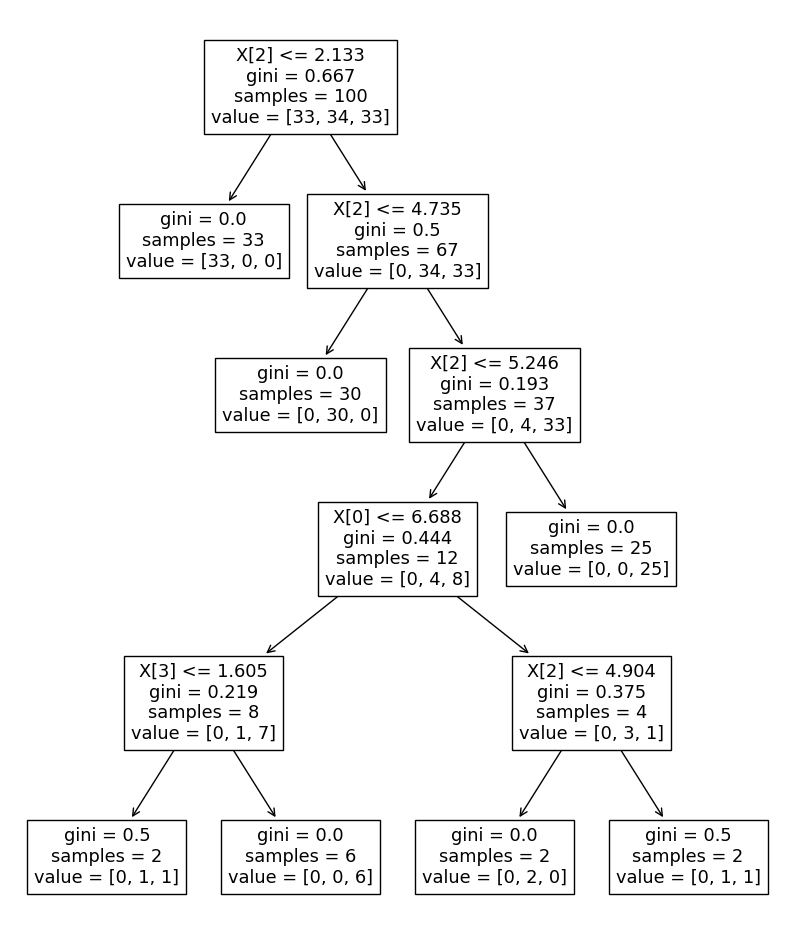

In [23]:
plt.figure(figsize=(10, 12))
plot_tree(forest[0])
plt.show()

### Random forest classifier

In [24]:
random_forest = RandomForestClassifier(n_estimators=20)

In [25]:
random_forest.fit(iris_data_train, iris_labels_train)

RandomForestClassifier(n_estimators=20)

In [26]:
random_forest.base_estimator_

DecisionTreeClassifier()

In [27]:
random_forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=739354107),
 DecisionTreeClassifier(max_features='sqrt', random_state=1535646812),
 DecisionTreeClassifier(max_features='sqrt', random_state=65552203),
 DecisionTreeClassifier(max_features='sqrt', random_state=2037097721),
 DecisionTreeClassifier(max_features='sqrt', random_state=2137260799),
 DecisionTreeClassifier(max_features='sqrt', random_state=1416011785),
 DecisionTreeClassifier(max_features='sqrt', random_state=227296262),
 DecisionTreeClassifier(max_features='sqrt', random_state=840728881),
 DecisionTreeClassifier(max_features='sqrt', random_state=45104310),
 DecisionTreeClassifier(max_features='sqrt', random_state=1440721215),
 DecisionTreeClassifier(max_features='sqrt', random_state=1781883523),
 DecisionTreeClassifier(max_features='sqrt', random_state=919345668),
 DecisionTreeClassifier(max_features='sqrt', random_state=1074614766),
 DecisionTreeClassifier(max_features='sqrt', random_state=612328609),
 DecisionTreeCl

In [28]:
random_forest.feature_importances_

array([0.06654131, 0.03251587, 0.45767582, 0.443267  ])

### AdaBoost

In [33]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20)

In [34]:
ada.fit(iris_data, iris_labels)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20)

In [35]:
ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=525438735),
 DecisionTreeClassifier(max_depth=1, random_state=517425025),
 DecisionTreeClassifier(max_depth=1, random_state=141947717),
 DecisionTreeClassifier(max_depth=1, random_state=540183333),
 DecisionTreeClassifier(max_depth=1, random_state=1895629285),
 DecisionTreeClassifier(max_depth=1, random_state=1267052179),
 DecisionTreeClassifier(max_depth=1, random_state=768129879),
 DecisionTreeClassifier(max_depth=1, random_state=1408765921),
 DecisionTreeClassifier(max_depth=1, random_state=1678979056),
 DecisionTreeClassifier(max_depth=1, random_state=1973347802),
 DecisionTreeClassifier(max_depth=1, random_state=101494804),
 DecisionTreeClassifier(max_depth=1, random_state=50214295),
 DecisionTreeClassifier(max_depth=1, random_state=1256882741),
 DecisionTreeClassifier(max_depth=1, random_state=228264788),
 DecisionTreeClassifier(max_depth=1, random_state=1224912131),
 DecisionTreeClassifier(max_depth=1, random_state=1313092429),
 

In [36]:
ada.score(iris_data_train, iris_labels_train)

0.98

In [38]:
ada.score(iris_data_test, iris_labels_test)

0.96